###**Cel ćwiczenia**
Celem laboratorium było rozwiązanie dwóch zadań z dziedziny elektrotechniki. Pierwszym z nich był dobór parametrów rezystorów użytych w mostku, tak aby minimalizować moc rozproszenia na rezystorach w układzie. W zadaniu są zawarte liczne ograniczenia związane z prądem jaki może przepływać przez poszczególne gałęzie układu. Znane są także napięcia na każdym z rezystorów.
Założenia zadania przedstawia zdjęcie:

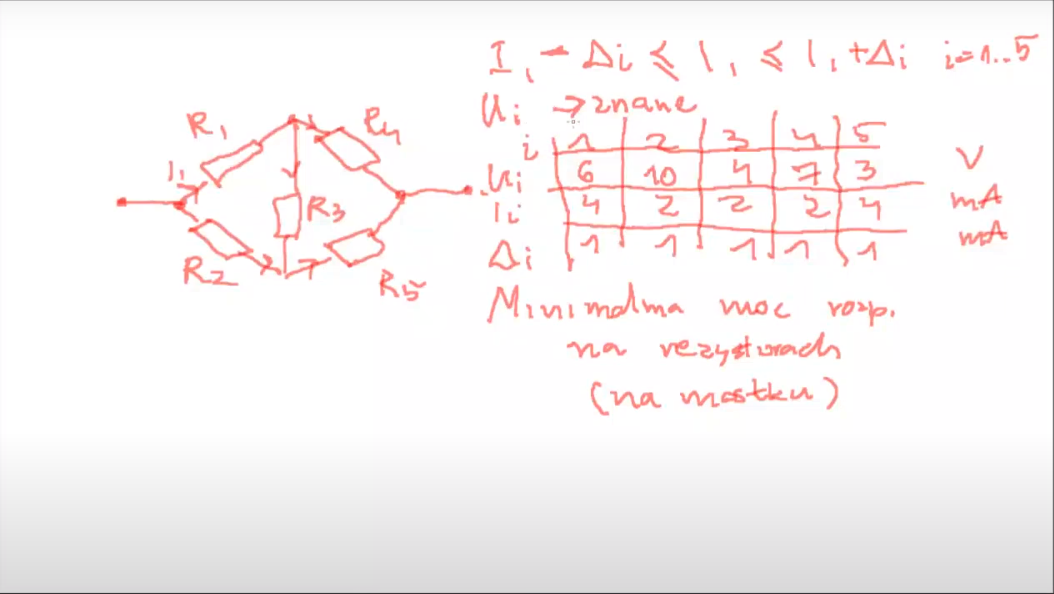

In [77]:
!pip install pulp
!conda install -c conda-forge pulp

/bin/bash: conda: command not found


In [2]:
import pulp

print(pulp.__version__)

2.3.1


In [3]:
from pulp import *

In [76]:
prob = LpProblem("Rezystory",LpMinimize) #definicja problemu. minimalizacja strat na rezystorach
x1=LpVariable("I1") #zmienne decyzyjne (prąd w poszczególnych gałęziach)
x2=LpVariable("I2")
x3=LpVariable("I3")
x4=LpVariable("I4")
x5=LpVariable("I5")
r1=LpVariable("r1")

prob += 6*x1 + 10*x2 + 4*x3 + 7*x4 + 3*x5, "Straty mocy" #obliczenie strat mocy
prob += x1 <= 5 and x1 >= 3, "I1" # ograniczenia prądów wynikające z założeń, że wartość prądu nie może różnić się od oczekiwanej o więcej niż 1A
prob += x2 <= 3 and x2 >= 1, "I2"
prob += x3 <= 3 and x3 >= 1, "I3"
prob += x4 <= 3 and x4 >= 1, "I4"
prob += x5 <= 5 and x5 >= 3, "I5"
prob += x1 == x4 + x3, "1" #warunki 1,2,3 wynikają z prawa Kirchoffa. Suma natężeń prądów wpływających do węzła jest równa sumie natężeń prądów wypływających z tego węzła.
prob += x5 == x2 + x3, "2"
prob += x4 + x5 == x1 + x2, "3"
prob.writeLP("Rezystory.lp")
prob.solve()
print("Status:", LpStatus[prob.status])

for v in prob.variables(): 
    print(v.name, "=", v.varValue) 
print("Minimalne straty mocy=", value(prob.objective)/1000) 
r1 = 6/x1.varValue #obliczenie parametrów poszczególnych rezystorów wyliczone z prawa Ohma R=U/I
r2 = 10/x2.varValue
r3 = 4/x3.varValue
r4 = 7/x4.varValue
r5 = 3/x5.varValue
print("r1 = ",r1)
print("r2 = ",r2)
print("r3 = ",r3)
print("r4 = ",r4)
print("r5 = ",r5)

Status: Optimal
I1 = 3.0
I2 = 1.0
I3 = 2.0
I4 = 1.0
I5 = 3.0
Minimalne straty mocy= 0.052
r1 =  2.0
r2 =  10.0
r3 =  2.0
r4 =  7.0
r5 =  1.0


Wynikiem rozwiązanego zadania są wartości zmiennych decyzyjnych użytych w zadaniu, które są wartościami natężenia prądu płynącego w poszczególnych gałęziach układu. Rezystancja została obliczona zgodnie z prawem Ohma (R=U/I). Optymalny dobór parrametrów rezystorów w tym zadaniu sprawia, że minimalne straty mocy wynnoszą 52mW. 

###**Drugie zadanie**
Drugim zadaniem do rozwiązania był problem wyznaczenia maksymalnego prądu jaki może płynąć przez obwód:

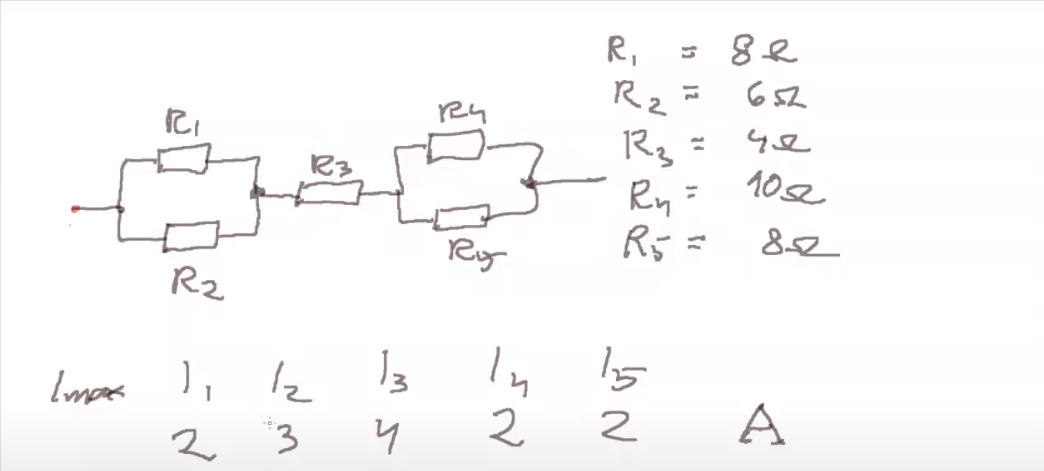

Znane są parrametry rezystorów oraz maksymalne prądy jakie mogą płynąć przez poszczególne gałęzie układu. 

In [ ]:
prob = LpProblem("Rezystor",LpMaximize) #definicja problemu. maksymalizacja wartości natężenia prądu w układzie
x1=LpVariable("I1") #zmienne decyzyjne - prądy w poszczególnych gałęziach
x2=LpVariable("I2")
x3=LpVariable("I3")
x4=LpVariable("I4")
x5=LpVariable("I5")
prob += x1 + x2, "maksymalny prąd" # maksymalny prąd wyliczony z sumy prądów gałęzi 1 i 2
prob += 8*x1 == 6*x2, "Napięcie na R1 i R2" #ograniczenie wynikające z faktu że napięcie na R1 jest równe napięciu na R2
prob += x1 + x2 == x3, "2" # ograniczenie wynikające, z prawa, że suma prądów wpłlywających do węzła jest równa sumie prądów wypływających
prob += x3 == x4 + x5, "3" # ograniczenie wynikające, z prawa, że suma prądów wpłlywających do węzła jest równa sumie prądów wypływających
prob += 10*x4 == 8*x5, "Napięcie na R4 i R5"#ograniczenie wynikające z faktu że napięcie na R4 jest równe napięciu na R5
prob += x1 <= 2, "5" #ograniczenia wynikające z założenia maksymalnych wartości natężenia prądu płynącego w poszczególnych gałęziach
prob += x2 <= 3, "6"
prob += x3 <= 4, "7"
prob += x4 <= 2, "8"
prob += x5 <= 2, "9"
prob.writeLP("Rezystor.lp")
prob.solve()
print("Status:", LpStatus[prob.status])
for v in prob.variables():
    print(v.name, "=", v.varValue)
print("Maksymalny prąd =", value(prob.objective))

Status: Optimal
I1 = 1.5428571
I2 = 2.0571429
I3 = 3.6
I4 = 1.6
I5 = 2.0
Maksymalny prąd = 3.6


W wyniku przeprowadzonego zadania otrzymaliśmy wartość maksymalnego prądu jaki może płynąć w obwodzie - 3,6A. Wynik ten spełnia wszystkie warunki i ograniczenia zawarte w treści zadania. W wyniku analizy otzrymaliśmy także wartości natężenia prądów w poszczególnych gałęziach układu przy przepływie przez ukła maksymalnej wartości prądu.